In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

In [6]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [26]:
label = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [40]:
x_train.shape

(50000, 32, 32, 3)

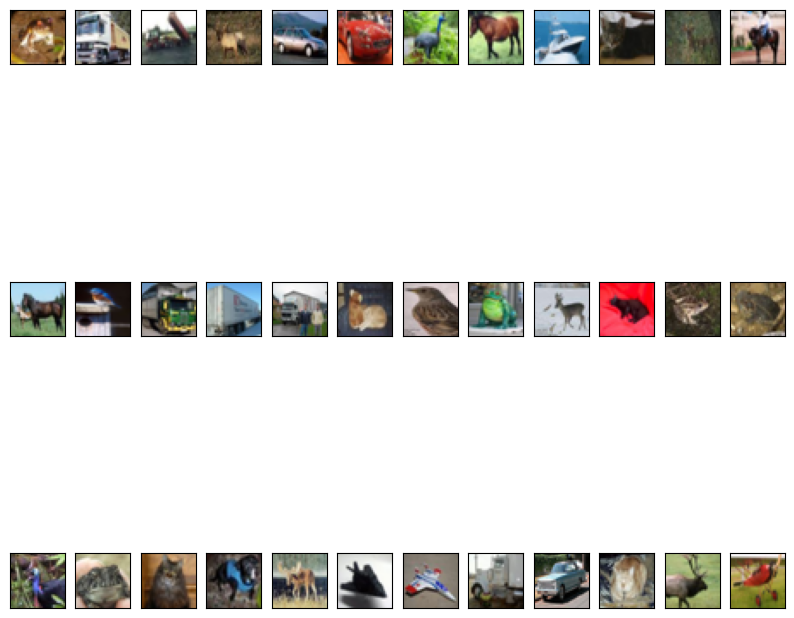

In [8]:
fig=plt.figure(figsize=(10,10))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

In [12]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [13]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [15]:
x_train

(50000, 32, 32, 3)

In [18]:
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same',strides=1,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=4, padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
hist=model.fit(x_train,y_train_ohe,epochs=100,batch_size=50,validation_data=(x_test,y_test_ohe),callbacks=[checkpoint,early_stopping_callback])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3231 - loss: 2.1857 - val_accuracy: 0.4896 - val_loss: 1.4002
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.5345 - loss: 1.2973 - val_accuracy: 0.5683 - val_loss: 1.2422
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.6085 - loss: 1.1083 - val_accuracy: 0.6098 - val_loss: 1.1107
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.6539 - loss: 0.9894 - val_accuracy: 0.6262 - val_loss: 1.0560
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6899 - loss: 0.8868 - val_accuracy: 0.6325 - val_loss: 1.0937
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7096 - loss: 0.8257 - val_accuracy: 0.6482 - val_loss: 1.0223
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7388 - loss: 0.7445 - val_accuracy: 0.6604 - val_loss: 1.0248
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 

In [22]:
model.evaluate(x_test,y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6652 - loss: 1.3482


[1.3348783254623413, 0.6675999760627747]

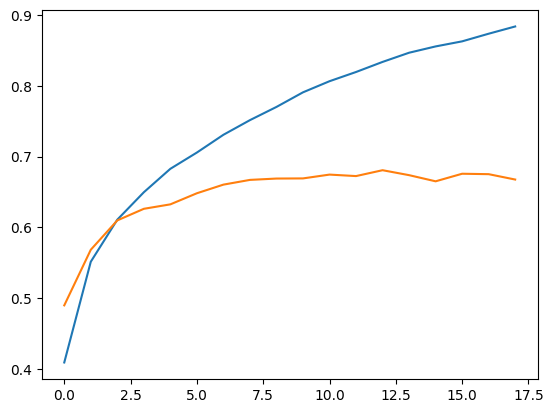

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


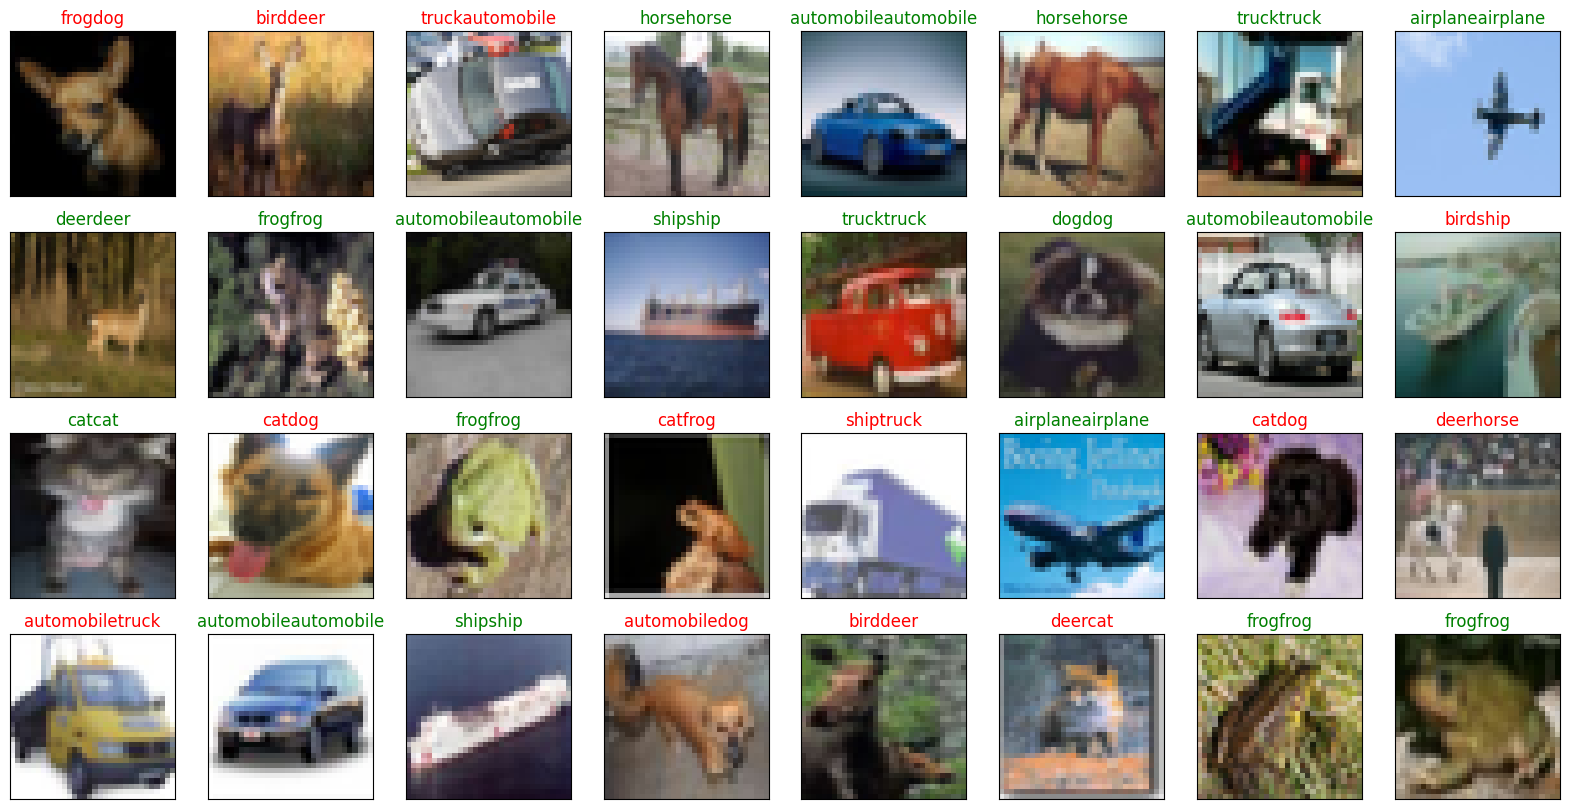

In [42]:
pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 10))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)): # 10000개중 random하게 32개 추출
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[]) # 도화지를 4행 8열로 나눔
    ax.imshow(x_test[idx])

    pred_idx = np.argmax(pred[idx]) # 모델이 예측한 idx값
    real_idx = np.argmax(y_test_ohe[idx]) # 실제 정답 idx

    ax.set_title('{}{}'.format(label[pred_idx], label[real_idx]), color='green' if pred_idx == real_idx else 'red')

In [31]:
from tensorflow.keras.applications import ResNet50

In [32]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [33]:
base_model.trainable=False

In [36]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
transfer_model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
transfer_model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))

In [37]:
transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
transfer_model.fit(x_train, y_train_ohe, epochs=100, batch_size=50, validation_data=(x_test, y_test_ohe))

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 150s 142ms/step - accuracy: 0.4684 - loss: 1.5286 - val_accuracy: 0.5818 - val_loss: 1.1957
Epoch 2/100
 688/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.6194 - loss: 1.0871

KeyboardInterrupt: 